# Part 3 - Model Exploration <a class="anchor" id="top"></a>
In this section, we will explore different regression models based on established libraries on our dataset. After comparing the different models' performance, we will pick the model with the best basic model accuracy and use it for further optimization in our next section. In our final result analysis, we wish to have two final optimized regression models 
1. Optimized Regression Model based on Gradient Descent
2. Optimized Regression Model based on an established library

**Overview of Implementation** 
1. <a href="#section1">Import Dataset</a>
2. <a href="#section2">Artificial Neural Network Model</a>
3. <a href="#section3">Random Forest Regression</a>
4. <a href="#section4">Linear Regression Model</a>
5. <a href="#section5">Support Vector Regression</a>
6. <a href="#section6">Regression based on Normal Equation</a>
7. <a href="#section7">K-Nearest Neighbour (KNN) Regression</a>
8. <a href="#section8">Result Analysis</a>

**Github Link**: https://github.com/leakin185/CE9010Project

## <a id='section1'>1. Import Dataset</a>

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
import researchpy as rp
import math
from scipy.stats import skew 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import mean, median, mode, stdev
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

from scipy import stats
# KNN regressor
from sklearn.neighbors import KNeighborsRegressor
# calculate error
from sklearn.metrics import r2_score
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [47]:
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train.dropna(subset=drop, inplace=True)

train

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [48]:
#One-Hot encoding
categoricalcolumns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
train1 = pd.get_dummies(train, columns= categoricalcolumns, prefix= categoricalcolumns)
print(train1)

        Id  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        1     8450       2003          2003       196.0         706   
1        2     9600       1976          1976         0.0         978   
2        3    11250       2001          2002       162.0         486   
3        4     9550       1915          1970         0.0         216   
4        5    14260       2000          2000       350.0         655   
...    ...      ...        ...           ...         ...         ...   
1455  1456     7917       1999          2000         0.0           0   
1456  1457    13175       1978          1988       119.0         790   
1457  1458     9042       1941          2006         0.0         275   
1458  1459     9717       1950          1996         0.0          49   
1459  1460     9937       1965          1965         0.0         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  \
0              0        150          856       856  ...     

[back to top](#top)

## <a id='section2'>2. Deep Learning - Artifical Neural Network Model (ANN)</a>
Artificial Neural Network is a model that is inspired by the brain and tries to replicate the way that humans learn. It consists of one input layer, a few hidden layers, and one output layer, with each hidden layer analysing different features of the dataset. During the training stage, the algorithm will learn to detect features that are relevant to predicting the output (ie SalePrice). It can also make use of backpropagation to correct mistakes during the training process, thus improving the model. <br> 
Here, we will use Keras which is a deep learning API written in Python, it can also be run on top of the machine learning platform TensorFlow.

We will first employ the default ANN model.

In [98]:
#train-test split
TEST_SIZE = 0.25

filteredData1 = train1.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE,shuffle = False) #put shuffle = False so that we can reuse the same training and test sets for better comparison

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [99]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(314, input_dim=314, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [100]:
# evaluate model based on kfolds in the training set
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, train_X, train_Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (-results.mean(), results.std()))

Baseline: 1620906880.00 (696756545.60) MSE


In [101]:
#fit model onto the train set and evaluate on the test set
estimator.fit(train_X, train_Y)
prediction = estimator.predict(test_X)

In [107]:
def score(y_pred,y_true): #define R2 accuracy score
    u = ((y_pred-y_true)**2).sum()
    v = ((y_true-y_true.mean())**2).sum()
    return (1-u/v)

In [103]:
#calculate the R2 score of accuracy for the model
score = score(prediction,test_Y)
print ("The R2 accuracy score is ", score)

The R2 accuracy score is  0.5030117174108558


### 2.1 Evaluate a Deeper Network Topology
One way to improve the performance a neural network is to add more layers. This might allow the model to extract and recombine higher order features embedded in the data.

We will evaluate the effect of adding one more hidden layer to the model.

In [112]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(314, input_dim=314, kernel_initializer='normal', activation='relu'))
    model.add(Dense(200, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [113]:
# evaluate model based on kfolds in the training set
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, train_X, train_Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (-results.mean(), results.std()))
estimator.fit(train_X, train_Y)
prediction = estimator.predict(test_X)

Baseline: 1619987942.40 (649474873.38) MSE


In [121]:
#calculate the R2 score of accuracy for the model
score1 = score(prediction,test_Y)
print ("The R2 accuracy score is ", score1)

The R2 accuracy score is  0.517040252243145


In [120]:
#accuracy improvement 
print ("R2 Accuracy improvement =", (score1-0.5030117174108558)/0.5030117174108558)

R2 Accuracy improvement = 0.027889081599327382


### 2.2. Evaluate a Wider Network Topology
Another approach to increasing the representational capability of the model is to create a wider network.
In this section we evaluate the effect of keeping a shallow network architecture and nearly doubling the number of neurons in the one hidden layer.
Here, we have increased the number of neurons in the hidden layer compared to the baseline model from 314 to 600.

In [109]:
# define wider model
def wider_model():
    #create model
    model = Sequential()
    model.add(Dense(600, input_dim=314, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [110]:
# evaluate model based on kfolds in the training set
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, train_X, train_Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (-results.mean(), results.std()))
estimator.fit(train_X, train_Y)
prediction = estimator.predict(test_X)

Baseline: 1640994131.20 (714831538.02) MSE


In [111]:
#calculate the R2 score of accuracy for the model
score2 = score(prediction,test_Y)
print ("The R2 accuracy score is ", score2)

The R2 accuracy score is  0.5116736941098374


In [122]:
#accuracy improvement 
print ("R2 Accuracy improvement =", (score2-0.5030117174108558)/0.5030117174108558)

R2 Accuracy improvement = 0.01722022847413429


In conclusion, we have seen that exploring both a deeper and wider network topology have improved the neural network model accuracy in our example.
[back to top](#top)

## <a id='section3'>3. Random Forest Regression</a>
This model can be used for both classification and regression, and is built on top of the Decision Tree method. It works by randomly selecting data subsets, creating decision trees on each subset, and then vote for the best solution. The more trees there are in the forest, the more robust the model. In this case, our predictive or dependent variable is the SalePrice.

We first employ a random forest regressor with default parameters.

In [7]:
#train-test split
TEST_SIZE = 0.25

filteredData1 = train1.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE,shuffle = False) #put shuffle = False so that we can reuse the same training and test sets for better comparison

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [9]:
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
model = regressor.fit(train_X, train_Y)
y_pred = model.predict(test_X)
train_accuracy = model.score(train_X,train_Y)
test_accuracy = model.score(test_X,test_Y)
print ("Train accuracy =", model.score(train_X,train_Y))
print ("Test accuracy =", model.score(test_X,test_Y))

Train accuracy = 0.9507081267362882
Test accuracy = 0.8115182777864649


In [10]:
#comparing the actual and the predicted SalePrice values
df = pd.DataFrame({'Real Values':test_Y, 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
1093,146000,142810.0
1094,129000,118300.0
1095,176432,186598.2
1097,170000,153460.0
1098,128000,107001.6
...,...,...
1455,175000,176593.0
1456,210000,198800.0
1457,266500,246700.0
1458,142125,160680.0


In [11]:
#Accuracy report
realVals = df["Real Values"]
predictedVals = df["Predicted Values"]
mse = mean_squared_error(realVals, predictedVals)
rmse = math.sqrt(mse)
print ("Mean square error (MSE) = ", mse)
print ("Root mean square error (RMSE) = ", rmse)
average_y = mean(realVals)
mbs = mean_absolute_error(realVals, predictedVals)
print("Mean absolute error (MBS) = ", mbs)
print ("The MBS occupies ",(mbs/average_y), " of the average SalePrice value")

Mean square error (MSE) =  1111456094.4083965
Root mean square error (RMSE) =  33338.50768118448
Mean absolute error (MBS) =  21267.98717201166
The MBS occupies  0.11622029403628305  of the average SalePrice value


### 3.1. Data Transformation - Reducing Skewness in Categorical Variables

**Dealing with highly skewed categorical features** <br>
As identifited from data exploration, we remove categorical variables with one category of data occuping >= 90% of data.

In [12]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
#skewness of categorical variables
max_percent = []
catogorical_skewed=[]
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))
#highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90:
        catogorical_skewed.append(i)
        print (i,"/ratio of the dominant category = ", rp.summary_cat(train[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 15
Street /ratio of the dominant category =  0.9964
LandContour /ratio of the dominant category =  0.9015000000000001
Utilities /ratio of the dominant category =  0.9993000000000001
LandSlope /ratio of the dominant category =  0.9467
Condition2 /ratio of the dominant category =  0.9898
RoofMatl /ratio of the dominant category =  0.9818000000000001
BsmtCond /ratio of the dominant category =  0.9246
Heating /ratio of the dominant category =  0.981
CentralAir /ratio of the dominant category =  0.9495999999999999
Electrical /ratio of the dominant category =  0.9226000000000001
Functional /ratio of the dominant category =  0.9336
GarageQual /ratio of the dominant category =  0.9504
GarageCond /ratio of the dominant category =  0.9612999999999999
PavedDrive /ratio of the dominant category =  0.9372
MiscFeature /ratio of the dominant category =  0.9216


In [13]:
for i in catogorical_skewed:
    train.drop(columns=[i], inplace=True)

In [14]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,NaN,Reg,Inside,CollgCr,Norm,1Fam,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,NaN,Reg,FR2,Veenker,Feedr,1Fam,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,NaN,IR1,Inside,CollgCr,Norm,1Fam,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,NaN,IR1,Corner,Crawfor,Norm,1Fam,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,NaN,IR1,FR2,NoRidge,Norm,1Fam,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
#One-Hot encoding
categoricalcolumns = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']
train1 = pd.get_dummies(train, columns= categoricalcolumns, prefix= categoricalcolumns)
print(train1)

        Id  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        1     8450       2003          2003       196.0         706   
1        2     9600       1976          1976         0.0         978   
2        3    11250       2001          2002       162.0         486   
3        4     9550       1915          1970         0.0         216   
4        5    14260       2000          2000       350.0         655   
...    ...      ...        ...           ...         ...         ...   
1455  1456     7917       1999          2000         0.0           0   
1456  1457    13175       1978          1988       119.0         790   
1457  1458     9042       1941          2006         0.0         275   
1458  1459     9717       1950          1996         0.0          49   
1459  1460     9937       1965          1965         0.0         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  \
0              0        150          856       856  ...     

In [16]:
#train-test split
TEST_SIZE = 0.25

filteredData1 = train1.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE,shuffle = False) #put shuffle = False so that we can reuse the same training and test sets for better comparison

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [17]:
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
model = regressor.fit(train_X, train_Y)
y_pred = model.predict(test_X)
train_accuracy_skew2 = model.score(train_X,train_Y)
test_accuracy_skew2 = model.score(test_X,test_Y)
print ("Train accuracy =", model.score(train_X,train_Y))
print ("Test accuracy =", model.score(test_X,test_Y))

Train accuracy = 0.9439292720560875
Test accuracy = 0.8519704214039903


In [18]:
mse = mean_squared_error(test_Y, y_pred)
mse

872914229.3004082

In [19]:
#improvement in accuracy
train_improvement = (train_accuracy_skew2 - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_skew2 - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = -0.7130321588258743 %
Test accuracy improvement = 4.984748307563018 %


Performing data transformation on the categorical variables has successfully increased the model accuracy.

[back to top](#top)

## <a id='section4'>4. Linear Regression Model</a>
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [23]:
model = LinearRegression()
X, y = train_X, train_Y
reg = model.fit(X, y)
train_accuracy = model.score(X,y)
test_accuracy = model.score(test_X,test_Y)
print ("Train accuracy = ", model.score(X, y)) #R-squared value
print ("Test accuracy = ", model.score(test_X,test_Y) ) #R-squared value

Train accuracy =  0.9208929975959248
Test accuracy =  0.699140039045052


In [24]:
predicted_y = reg.predict(test_X)
mse = mean_squared_error(test_Y, predicted_y)
rmse = math.sqrt(mse)
print ("Root mean square error (RMSE) = ", rmse)

Root mean square error (RMSE) =  42120.5208080636


### 4.1 Feature Selection 
We can select variables which are most closely related to SalePrice and use them to tune the regression model.

In [25]:
# variables most closely related to SalePrice
corr = train1.corr()['SalePrice']
feature_select=[]
corrshape=corr.nlargest(corr.shape[0])[1:corr.shape[0]].shape[0]
for i in range(corrshape-1):
    if (abs(corr.nlargest(corrshape)[1:corrshape][i])>0.3):
        feature_select.append(corr.nlargest(corrshape)[1:corrshape].axes[0][i])
print(corr.nlargest(corrshape)[1:corrshape])
print(len(feature_select))

GrLivArea            0.709783
GarageCars           0.636173
GarageArea           0.607197
TotalBsmtSF          0.603284
1stFlrSF             0.596087
                       ...   
OverallQual_5       -0.383080
GarageType_Detchd   -0.406550
BsmtQual_TA         -0.456964
GarageFinish_Unf    -0.485273
KitchenQual_TA      -0.527689
Name: SalePrice, Length: 314, dtype: float64
47


In [26]:
#train-test split
TEST_SIZE = 0.25

filteredData2 = train1.drop(['Id'], axis=1)[feature_select+['SalePrice']]
train_df, test_df = train_test_split(filteredData2, test_size=TEST_SIZE, random_state = 0)

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

# initialisation for training data
model = LinearRegression()
X, y = train_X, train_Y
reg = model.fit(X, y)
train_accuracy_select = model.score(X,y)
test_accuracy_select = model.score(test_X,test_Y)
print ("Train accuracy = ", model.score(X, y)) #R-squared value
print ("Test accuracy = ", model.score(test_X,test_Y) ) #R-squared value

Train accuracy =  0.8607185591841964
Test accuracy =  0.7112439464939583


In [27]:
predicted_y = reg.predict(test_X)
mse = mean_squared_error(test_Y, predicted_y)
rmse = math.sqrt(mse)
print ("Root mean square error (RMSE) = ", rmse)

Root mean square error (RMSE) =  42549.160182624335


In [28]:
#improvement in accuracy
train_improvement = (train_accuracy_select - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_select - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = -6.534357256360868 %
Test accuracy improvement = 1.7312565112761853 %


Feature selection has improved the prediction model greatly

### 4.2 Parameter Tuning
We can tune the parameters in the LinearRegression Model with some trials and errors to see if it can help to improve model accuracy

In [29]:
#Removing intercept for the model
model = LinearRegression(fit_intercept= False)
X, y = train_X, train_Y
reg = model.fit(X, y)
train_accuracy1 = model.score(X,y)
test_accuracy1 = model.score(test_X,test_Y)
print ("Train accuracy = ", model.score(X, y)) #R-squared value
print ("Test accuracy = ", model.score(test_X,test_Y) ) #R-squared value

Train accuracy =  0.8582094836907186
Test accuracy =  0.714414094316355


In [30]:
predicted_y = reg.predict(test_X)
mse = mean_squared_error(test_Y, predicted_y)
mse

1790554967.5726895

In [31]:
#improvement in accuracy
train_improvement = (train_accuracy1 - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy1 - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = -6.806818389199097 %
Test accuracy improvement = 2.1846918239964874 %


Removing an intercept for the prediction model has actually improved the prediction accuracy, meaning that the data is more centered than expected. With trial and errors (not listed here), all other changes in parameter did not improve the model accuracy.

[back to top](#top)

## <a id='section5'>5. Support Vector Regression</a>
Support Vector Regression (SVR) uses the same principle as Support Vector Machine (SVM), finding a suitable line/hyperplane for regression/classification.
The aim of SVR is to decide a decision boundary with a distance (epsilon) away from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.

In [55]:
#train-test split
TEST_SIZE = 0.25

filteredData1 = train1.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE)

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

# initialisation for training data
x_train=train_X.to_numpy()
y_train=train_Y.to_numpy()[:,None]
n_train=x_train.shape[0]
f_train=x_train.shape[1]
X = np.ones([n_train,f_train+1]) 
X[:,1:] = x_train

# initialisation for test data 
x_test=test_X.to_numpy()
y_test=test_Y.to_numpy()[:,None]
n_test=x_test.shape[0]
f_test=x_test.shape[1]
X_test = np.ones([n_test,f_test+1]) 
X_test[:,1:] = x_test

We apply the model With different kernel type used in the algorithm.


<img src = "Screenshot%202021-04-08%20at%204.25.34%20PM.png" style = "width:300px;height:/">

In [56]:
# applying svr with default rbf kernel
regr = make_pipeline(StandardScaler(), SVR(C=0.0001, epsilon=10))
regr.fit(x_train, y_train.ravel())
# calculating accuracy
print ("Train accuracy = ", regr.score(x_train, y_train))
print ("Test accuracy = ", regr.score(x_test,y_test))

Train accuracy =  -0.05897497356055803
Test accuracy =  -0.06197389041034018


In [57]:
# applying svr with polynomial kernel
regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=50, gamma='auto', degree=3, epsilon=.1,
               coef0=1))
regr.fit(x_train, y_train.ravel())
# calculating accuracy
print ("Train accuracy = ", regr.score(x_train, y_train))
print ("Test accuracy = ", regr.score(x_test,y_test))

Train accuracy =  0.09419958859985245
Test accuracy =  0.11395533855875062


In [58]:
# applying svr with sigmoid kernel
regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=50, gamma='auto'))
regr.fit(x_train, y_train.ravel())
# calculating accuracy
print ("Train accuracy = ", regr.score(x_train, y_train))
print ("Test accuracy = ", regr.score(x_test,y_test))

Train accuracy =  -0.012975003592345713
Test accuracy =  -0.0038648789904363046


In [59]:
# applying svr with linear kernel
regr = make_pipeline(StandardScaler(), SVR(kernel='linear', C=50, gamma='auto'))
regr.fit(x_train, y_train.ravel())
# calculating accuracy
print ("Train accuracy = ", regr.score(x_train, y_train))
print ("Test accuracy = ", regr.score(x_test,y_test))

Train accuracy =  0.8778475318630125
Test accuracy =  0.7615839190337996


Best performing SVR is with linear kernel, this shows that a linear kernel works better than non-linear kernel for our dataset.

[back to top](#top)



## <a id='section6'>6. K-Nearest Neighbour (KNN) Regression</a>

The K-Nearest Neighbours Regression method, or KNN Regression, makes predictions based on how closely a new point resembles an existing point in the train set. For this project, we will use the built in module from SciKit Learn, KNeighborsRegressor.

**Pre-processing** <br> 
We will test this method with different pre-processing on our dataset. The versions shown below are the ones that give the best accuracy (in terms of R2 score).

### 6.1 Model with Basic Pre-Processing
Null data are removed and One-Hot Encoding applied.

In [101]:
# import dataset
train0 = pd.read_csv('train.csv')

# Remove null
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train0)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train0.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train0.dropna(subset=drop, inplace=True)

# OHE
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
train0 = pd.get_dummies(train0, columns= categorical, prefix= categorical)

train0.head()

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


### 6.2 Model with more Data Engineering

In [103]:
# import dataset
train1 = pd.read_csv('train.csv')

In [104]:
# For feature with too many missing values, remove this feature entirely.
# Set treshold to be 10% of all data points
# For feature with only a few missing values, remove that data point.

# from EDA
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train1)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train1.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train1.dropna(subset=drop, inplace=True)

train1.head()

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
# Remove highly skewed categorical variables, with one category of data occuping >= 90% of data.

categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# skewness of categorical variables
max_percent = []
catogorical_skewed=[]
for i in categorical: 
    if rp.summary_cat(train1[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train1[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))

# highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train1[i])["Percent"].max() >= 90:
        catogorical_skewed.append(i)
        print (i,"/ratio of the dominant category = ", rp.summary_cat(train1[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 15
Street /ratio of the dominant category =  0.9964
LandContour /ratio of the dominant category =  0.9015000000000001
Utilities /ratio of the dominant category =  0.9993000000000001
LandSlope /ratio of the dominant category =  0.9467
Condition2 /ratio of the dominant category =  0.9898
RoofMatl /ratio of the dominant category =  0.9818000000000001
BsmtCond /ratio of the dominant category =  0.9246
Heating /ratio of the dominant category =  0.981
CentralAir /ratio of the dominant category =  0.9495999999999999
Electrical /ratio of the dominant category =  0.9226000000000001
Functional /ratio of the dominant category =  0.9336
GarageQual /ratio of the dominant category =  0.9504
GarageCond /ratio of the dominant category =  0.9612999999999999
PavedDrive /ratio of the dominant category =  0.9372
MiscFeature /ratio of the dominant category =  0.9216


In [106]:
# Drop
for i in catogorical_skewed:
    train1.drop(columns=[i], inplace=True)

In [107]:
for i in catogorical_skewed:
    categorical.remove(i)
#skewness of categorical variables
max_percent = []
for i in categorical: 
    if rp.summary_cat(train1[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train1[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))
#highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train1[i])["Percent"].max() >= 90: 
         print (i,"/ratio of the dominant category = ", rp.summary_cat(train1[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 0


In [108]:
# One hot encoding
train1 = pd.get_dummies(train1, columns= categorical, prefix= categorical)
train1.head()

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [109]:
# Removing highly skewed continuous data
# Use interquartile range (IQR) method to remove the outliers for continuous variables with skewness value > 1

# identifying continuous variables with high skewness
continuous = ['LotArea', 'YearBuilt', 'YearRemodAdd', 
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
array1 = skew(train1[continuous])

#the top 15 features which are the most skewed
index1 = array1.argsort()[-15:][::-1]
continuous_skewed=[]
for i in index1:
    print (continuous[i],": skewness = ", array1[i])
    if array1[i]>=1:
        continuous_skewed.append(continuous[i])

MiscVal : skewness =  24.732979451706033
PoolArea : skewness =  14.342881566937836
LotArea : skewness =  12.025446327344339
LowQualFinSF : skewness =  10.66505349858299
3SsnPorch : skewness =  9.96262046395852
KitchenAbvGr : skewness =  5.129053439295553
BsmtFinSF2 : skewness =  4.174330005566947
ScreenPorch : skewness =  3.967379533802487
BsmtHalfBath : skewness =  3.89811918894981
EnclosedPorch : skewness =  3.214887613130617
MasVnrArea : skewness =  2.588332838278803
OpenPorchSF : skewness =  2.2638025759950504
BsmtFinSF1 : skewness =  1.6941364533315026
TotalBsmtSF : skewness =  1.6330286577439608
WoodDeckSF : skewness =  1.5027101898713007


In [110]:
print('train1 shape\t\t:',train1.shape)
# calculate interquartile range
q25, q75 = train1[continuous_skewed].quantile(0.25), train1[continuous_skewed].quantile(0.75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

train1_iqr = train1[~((train1>upper)).any(axis=1)]
print('train1_iqr shape\t:', train1_iqr.shape)

train1 shape		: (1370, 248)
train1_iqr shape	: (688, 248)


In [111]:
#calculating skewness of continuous variables
array = skew(train1_iqr[continuous])
#the top 3 features which are the most skewed
print('Top 3 features which are the most skewed:')
index = array.argsort()[-3:][::-1]
for i in index: 
    print (continuous[i],": skewness = ", array[i])

Top 3 features which are the most skewed:
MasVnrArea : skewness =  1.1633497486834365
OpenPorchSF : skewness =  1.0088075868431694
WoodDeckSF : skewness =  0.77571907189836


In [112]:
# Applying Standardization (Z-Score method)
# Transform data into a distribution with mean of 0 and standard deviation of 1.

features = train1.copy()

# transform
for i in continuous:
    # fit on training data column
    scale = StandardScaler().fit(features[[i]])
    # transform training data column
    train1[i] = scale.transform(train1[[i]])
    
train1.head()

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.218825,1.029146,0.864397,0.471073,0.548776,-0.293876,-0.947855,-0.499247,-0.830872,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.106353,0.109538,-0.456189,-0.591131,1.141603,-0.293876,-0.645978,0.433229,0.223013,...,0,0,0,1,0,0,0,0,1,0
2,3,0.055020,0.961026,0.815486,0.286813,0.069283,-0.293876,-0.308055,-0.352256,-0.664743,...,0,0,0,1,0,0,0,0,1,0
3,4,-0.111243,-1.968095,-0.749653,-0.591131,-0.519185,-0.293876,-0.069257,-0.728921,-0.558316,...,0,0,0,1,1,0,0,0,0,0
4,5,0.349403,0.926967,0.717665,1.305662,0.437621,-0.293876,-0.181898,0.164510,-0.080693,...,0,0,0,1,0,0,0,0,1,0


In [113]:
# Feature selection
# Choosing variables that is correlated to SalePrice with absolute value more than 0.2

# variables most closely related to SalePrice
corr = train1.corr()['SalePrice']
# print(corr)
feature_select=[]
corrshape=corr.nlargest(corr.shape[0])[1:corr.shape[0]].shape[0]
# print(corrshape)
for i in range(corrshape-1):
    if (abs(corr.nlargest(corrshape)[1:corrshape][i])>0.2):
        feature_select.append(corr.nlargest(corrshape)[1:corrshape].axes[0][i])
        
print('Number of features selected = ', len(feature_select))        
print(corr.nlargest(corrshape)[1:corrshape])

Number of features selected =  68
GrLivArea            0.709783
GarageCars           0.636173
GarageArea           0.607197
TotalBsmtSF          0.603284
1stFlrSF             0.596087
                       ...   
OverallQual_5       -0.383080
GarageType_Detchd   -0.406550
BsmtQual_TA         -0.456964
GarageFinish_Unf    -0.485273
KitchenQual_TA      -0.527689
Name: SalePrice, Length: 246, dtype: float64


In [114]:
train1 = train1[feature_select+['Id', 'SalePrice']]
train1.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,KitchenQual_Ex,YearBuilt,...,HeatingQC_TA,MasVnrType_None,Foundation_CBlock,OverallQual_5,GarageType_Detchd,BsmtQual_TA,GarageFinish_Unf,KitchenQual_TA,Id,SalePrice
0,0.339976,0.207038,0.255686,-0.499247,-0.830872,0.772268,0,0.910628,0,1.029146,...,0,0,0,0,0,0,0,0,1,208500
1,-0.522724,0.207038,-0.217635,0.433229,0.223013,0.772268,0,-0.346993,0,0.109538,...,0,1,1,0,0,0,0,1,2,181500
2,0.486327,0.207038,0.578405,-0.352256,-0.664743,0.772268,0,-0.346993,0,0.961026,...,0,0,0,0,0,0,0,0,3,223500
3,0.353456,1.791633,0.761280,-0.728921,-0.558316,-1.055033,0,0.281817,0,-1.968095,...,0,1,0,0,1,1,1,0,4,140000
4,1.279704,1.791633,1.804738,0.164510,-0.080693,0.772268,0,1.539439,0,0.926967,...,0,0,0,0,0,0,0,0,5,250000


### 6.3 Training the two Models

Training on the basic model without much pre-processing

In [115]:
print('KNN for train0:')

X0 = train0.copy()
X0.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y0 = train0['SalePrice'][:,None]

train_X0, test_X0, train_y0, test_y0 = train_test_split(X0,y0,test_size=0.2,shuffle = False)

R2_0 = []

for K in range(20):
    K += 1
    
    knn = KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X0, train_y0)  #fit the model
    pred = knn.predict(test_X0) #make prediction on test set
    
    R2 = r2_score(test_y0, pred)
    R2_0.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)

KNN for train0:
R2 score for k =  1 is: 0.42585399685555725
R2 score for k =  2 is: 0.4540387059646859
R2 score for k =  3 is: 0.4995254532564951
R2 score for k =  4 is: 0.5157478471035619
R2 score for k =  5 is: 0.5343182558438143
R2 score for k =  6 is: 0.5296867739288087
R2 score for k =  7 is: 0.5478720018956165
R2 score for k =  8 is: 0.5770793199677777
R2 score for k =  9 is: 0.5687173114047754
R2 score for k =  10 is: 0.5721980208957658
R2 score for k =  11 is: 0.5804159984880813
R2 score for k =  12 is: 0.572541588341702
R2 score for k =  13 is: 0.573503639235723
R2 score for k =  14 is: 0.569839989017157
R2 score for k =  15 is: 0.5686068873852896
R2 score for k =  16 is: 0.5659677469738039
R2 score for k =  17 is: 0.5719230361109309
R2 score for k =  18 is: 0.5672092053014337
R2 score for k =  19 is: 0.5795055271073961
R2 score for k =  20 is: 0.577853731914251


Text(0.5, 1.0, 'R2 test score:')

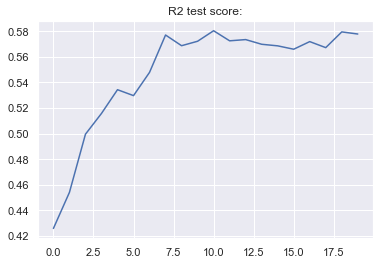

In [116]:
plt.plot(R2_0)
plt.title("R2 test score:")

In [117]:
print('Best R2 score is \t\t:', max(R2_0))
print('Most optimal value of K is \t:', R2_0.index(max(R2_0))+1)

Best R2 score is 		: 0.5804159984880813
Most optimal value of K is 	: 11


training on the model with more data engineering done

In [118]:
print('KNN for train1:')

X1 = train1.copy()
X1.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y1 = train1['SalePrice'][:,None]

train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1,test_size=0.2, shuffle = False)

R2_1 = []

for K in range(20):
    K += 1
    
    knn = KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X1, train_y1)  #fit the model
    pred = knn.predict(test_X1) #make prediction on test set
    
    R2 = r2_score(test_y1, pred)
    R2_1.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)

KNN for train1:
R2 score for k =  1 is: 0.7110883355046149
R2 score for k =  2 is: 0.7753698729048177
R2 score for k =  3 is: 0.7199195075405649
R2 score for k =  4 is: 0.6987541615980484
R2 score for k =  5 is: 0.6971846131306108
R2 score for k =  6 is: 0.6984476547848533
R2 score for k =  7 is: 0.7084783707836871
R2 score for k =  8 is: 0.7318312163517966
R2 score for k =  9 is: 0.7275377531037335
R2 score for k =  10 is: 0.7313291448376116
R2 score for k =  11 is: 0.7322966771092887
R2 score for k =  12 is: 0.7308222825136851
R2 score for k =  13 is: 0.7292531352675602
R2 score for k =  14 is: 0.7268767379051577
R2 score for k =  15 is: 0.7259732799376175
R2 score for k =  16 is: 0.7273830400893874
R2 score for k =  17 is: 0.7207280584612332
R2 score for k =  18 is: 0.7276900099278917
R2 score for k =  19 is: 0.724064558693547
R2 score for k =  20 is: 0.7244701968728027


Text(0.5, 1.0, 'R2 test score:')

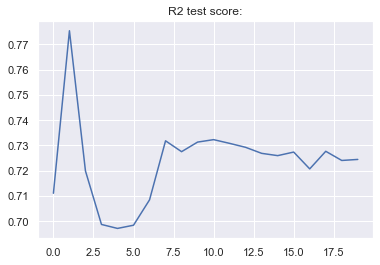

In [119]:
plt.plot(R2_1)
plt.title("R2 test score:")

In [85]:
print('Best R2 score is \t\t:', max(R2_1))
print('Most optimal value of K is \t:', R2_1.index(max(R2_1))+1)

Best R2 score is 		: 0.7753698729048177
Most optimal value of K is 	: 2


## <a id='section7'>7. Regression based on Normal Equation </a>

Normal equation is a method of using matrix multiplication to obtain the parameters of the best fit line.

Here, we will first define the normal equation functions.

In [86]:
def w_normaleqn(X,y):
    a = X.T.dot(X)
    b = X.T.dot(y)
    w = np.linalg.inv(a).dot(b)
    return w

def mseloss_normaleqn(X,w,y):
    n = len(X)
    Xwy = X.dot(w)-y
    loss= 1/n*Xwy.T.dot(Xwy)
    return loss

def f_pred(X,w):
    f = X.dot(w)
    return f

In [87]:
def grad_loss_normaleqn(y_pred,y,X):
    n = len(y)
    grad = 2/n*(X.T.dot(y_pred)-X.T.dot(y))
    return grad

We tried training the normal equation model wih some different types of pre-processing on the dataset. The version shown below is the one that gives the best test accuracy (in terms of R2 score).

In [120]:
# import dataset
train = pd.read_csv('train.csv')

In [121]:
# Remove null
# For feature with too many missing values, remove this feature entirely.
# Set treshold to be 10% of all data points
# For feature with only a few missing values, remove that data point.

# from EDA
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train.dropna(subset=drop, inplace=True)

train.head()

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
# Remove highly skewed categorical variables, with one category of data occuping >= 90% of data.

categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# skewness of categorical variables
max_percent = []
catogorical_skewed=[]
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))

# highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90:
        catogorical_skewed.append(i)
        print (i,"/ratio of the dominant category = ", rp.summary_cat(train[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 15
Street /ratio of the dominant category =  0.9964
LandContour /ratio of the dominant category =  0.9015000000000001
Utilities /ratio of the dominant category =  0.9993000000000001
LandSlope /ratio of the dominant category =  0.9467
Condition2 /ratio of the dominant category =  0.9898
RoofMatl /ratio of the dominant category =  0.9818000000000001
BsmtCond /ratio of the dominant category =  0.9246
Heating /ratio of the dominant category =  0.981
CentralAir /ratio of the dominant category =  0.9495999999999999
Electrical /ratio of the dominant category =  0.9226000000000001
Functional /ratio of the dominant category =  0.9336
GarageQual /ratio of the dominant category =  0.9504
GarageCond /ratio of the dominant category =  0.9612999999999999
PavedDrive /ratio of the dominant category =  0.9372
MiscFeature /ratio of the dominant category =  0.9216


In [123]:
# Drop
for i in catogorical_skewed:
    train.drop(columns=[i], inplace=True)

In [124]:
for i in catogorical_skewed:
    categorical.remove(i)
#skewness of categorical variables
max_percent = []
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))
#highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
         print (i,"/ratio of the dominant category = ", rp.summary_cat(train[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 0


In [125]:
# One hot encoding
train = pd.get_dummies(train, columns= categorical, prefix= categorical)
train.head()

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [126]:
# Feature selection
# Choosing variables that is correlated to SalePrice with absolute value more than 0.2

# variables most closely related to SalePrice
corr = train.corr()['SalePrice']
# print(corr)
feature_select=[]
corrshape=corr.nlargest(corr.shape[0])[1:corr.shape[0]].shape[0]
# print(corrshape)
for i in range(corrshape-1):
    if (abs(corr.nlargest(corrshape)[1:corrshape][i])>0.2):
        feature_select.append(corr.nlargest(corrshape)[1:corrshape].axes[0][i])
        
print('Number of features selected = ', len(feature_select))        
print(corr.nlargest(corrshape)[1:corrshape])

Number of features selected =  68
GrLivArea            0.709783
GarageCars           0.636173
GarageArea           0.607197
TotalBsmtSF          0.603284
1stFlrSF             0.596087
                       ...   
OverallQual_5       -0.383080
GarageType_Detchd   -0.406550
BsmtQual_TA         -0.456964
GarageFinish_Unf    -0.485273
KitchenQual_TA      -0.527689
Name: SalePrice, Length: 246, dtype: float64


In [127]:
train = train[feature_select+['Id', 'SalePrice']]
train.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,KitchenQual_Ex,YearBuilt,...,HeatingQC_TA,MasVnrType_None,Foundation_CBlock,OverallQual_5,GarageType_Detchd,BsmtQual_TA,GarageFinish_Unf,KitchenQual_TA,Id,SalePrice
0,1710,2,548,856,856,2,0,8,0,2003,...,0,0,0,0,0,0,0,0,1,208500
1,1262,2,460,1262,1262,2,0,6,0,1976,...,0,1,1,0,0,0,0,1,2,181500
2,1786,2,608,920,920,2,0,6,0,2001,...,0,0,0,0,0,0,0,0,3,223500
3,1717,3,642,756,961,1,0,7,0,1915,...,0,1,0,0,1,1,1,0,4,140000
4,2198,3,836,1145,1145,2,0,9,0,2000,...,0,0,0,0,0,0,0,0,5,250000


Now, we will run the function on the pre-processed dataset.

In [128]:
X1 = train.copy()
X1.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y1 = train['SalePrice'][:,None]

train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1,test_size=0.2, shuffle=False)

train_X1.insert(0, 'ones', 1)
test_X1.insert(0, 'ones', 1)


start = time.time()
w1 = w_normaleqn(train_X1,train_y1)
print('Time =',time.time() - start)

y_pred = f_pred(train_X1, w1)
r2_train1 = r2_score(train_y1, y_pred)
print('Train R2 score \t=', r2_train1)

y_pred = f_pred(test_X1, w1)
r2_test1 = r2_score(test_y1, y_pred)
print('Test R2 score \t=', r2_test1)

Time = 0.005500078201293945
Train R2 score 	= 0.8827229771923898
Test R2 score 	= 0.6685651754967088


## <a id='section8'>8. Result Analysis</a>

In [130]:
models = pd.DataFrame({
    'Model': [ 'Support Vector Regression', 'Linear Regression', 'Random Forest Regression','K-Nearest Neighbour Regression','Artificial Neural Network','Regression based on Normal Equation'],
    'Best Test R2 Score': [ 0.762,0.714, 0.852, 0.775, 0.517, 0.669]})

models = models.sort_values(by='Best Test R2 Score', ascending=False)
models.style.hide_index()

Model,Best Test R2 Score
Random Forest Regression,0.852000
K-Nearest Neighbour Regression,0.775000
Support Vector Regression,0.762000
Linear Regression,0.714000
Regression based on Normal Equation,0.669000
Artificial Neural Network,0.517000


As seen from the result, Random Forest has produced the highest test R2 score so we will proceed to use the Random Forest Regression Model in part 5 of our data analysis pipeline for further optimization.

[back to top](#top)